In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data into a Pandas dataframe
dataset = pd.read_csv("NSE_TATA.csv")

# Convert the 'Date' column to a datetime datatype and set it as the index
dataset['Date'] = pd.to_datetime(dataset.Date, format='%Y-%m-%d')
dataset = dataset.set_index('Date')

In [258]:
dataset.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2022-04-22,818.0,821.60,803.10,811.60,815.60,1880668,15288.05349
2022-04-21,812.0,822.00,804.25,818.95,820.05,1344250,10958.17570
2022-04-20,800.0,813.45,792.10,810.10,810.45,1522453,12244.14776
2022-04-19,825.0,836.85,784.85,788.00,791.35,2460482,20063.01436
2022-04-18,816.2,824.90,809.00,822.50,822.30,1480954,12102.61050


In [259]:
dataset.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2016-01-07,144.10,144.7,139.00,139.50,140.05,1034747,1461.837445
2016-01-06,147.10,149.8,144.50,145.20,145.25,834054,1225.465383
2016-01-05,144.00,149.5,142.20,148.65,148.35,1502760,2195.837451
2016-01-04,145.90,147.2,142.25,143.00,143.70,950484,1367.840772
2016-01-01,146.05,148.8,145.50,146.40,146.40,781067,1148.710241


In [260]:
# Define the number of days to forecast
predict_days =60

# Create a new column in the dataframe to hold the prediction values
dataset['Prediction'] = dataset['Close'].shift(-predict_days)

In [261]:
# Remove the 'Prediction' column from the input data
X = dataset.drop(['Prediction'], axis=1)

# Remove the last 'forecast_out' rows from the dataframe (as these will not have a prediction value)
X = X[:-predict_days]

In [262]:
# Extract the 'Prediction' column as the output variable
y = dataset['Prediction']

# Remove the last 'forecast_out' rows from the output variable
y = y[:-predict_days]


In [263]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [264]:
# Create a linear regression model and fit it to the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [265]:
# Evaluate the model on the testing data
linear_model_score = linear_model.score(X_test, y_test)
print('Linear model score:', linear_model_score)

Linear model score: 0.9239549859817147


In [266]:
# Use the model to predict the next 'forecast_out' days
X_predict = dataset.drop(['Prediction'], axis=1).tail(predict_days)
linear_model_forecast_prediction = linear_model.predict(X_predict)

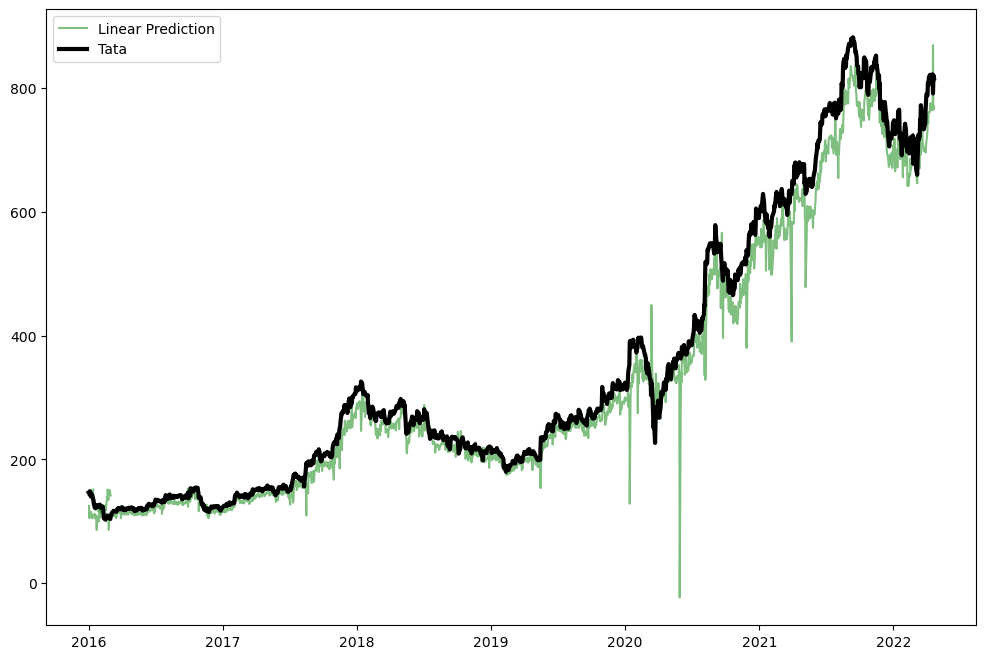

In [267]:
# Use the model to predict the entire dataset
linear_model_real_prediction = linear_model.predict(dataset.drop(['Prediction'], axis=1))

# Create a list of dates for the forecasted period
predicted_dates = [dataset.index[-1] + timedelta(days=i) for i in range(1, predict_days+1)]

# Plot the predicted and actual prices 
fig, ax = plt.subplots(figsize=(12, 8))
display_at = 1700
alpha = 0.5

plt.plot(dataset.index[-display_at:], linear_model_real_prediction[-display_at:], label='Linear Prediction', c='green', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(dataset.index[-display_at:], dataset['Close'][-display_at:], label='Tata', c='black', linewidth=3)
plt.legend()